# Example of getting Sentinel2 data

Example gets field information from database, retrieves Sentinel 2 images and calculates vegetation indices for each zone

In [1]:
import sys
sys.path.append("..")
from twinyields.eo import Sentinel2
from twinyields.database import TwinDataBase

### Get field and zones

<AxesSubplot:>

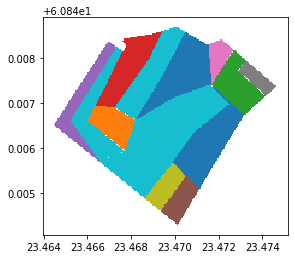

In [2]:
db = TwinDataBase()
field, zones = db.get_field()
zones.plot(column="zone")

### Download and process S2 data

In [3]:
%%time
startdate = "2022-06-15"
enddate = "2022-06-23"
s2 = Sentinel2()
# Get satellite data for whole field
s2.get_data(field, startdate, enddate) 

Searching S2 data from 2022-06-15 to 2022-06-23 for area RVIII
Found 6 available S2 acquisition dates.
Retrieving S2 data...
2 good observations available. Retrieving data...
Retrieving band data for item S2B_34VFN_20220619_0_L2A
Retrieving band data for item S2B_34VFN_20220616_0_L2A
CPU times: user 5.47 s, sys: 1.15 s, total: 6.62 s
Wall time: 2min 20s


In [4]:
%%time
# Extract zones
s2.get_zones(zones)

Processing zone0
Processing zone1
Processing zone2
Processing zone3
Processing zone4
Processing zone5
Processing zone6
Processing zone7
Processing zone8
Processing zone9
Processing zone10
Processing zone11
CPU times: user 1.62 s, sys: 147 ms, total: 1.76 s
Wall time: 1.58 s


In [5]:
# Indices by zones
s2.zone_indices()

,zone,field_name,time,LAI,FAPAR,NDVI
0,zone0,RVIII,2022-06-16 09:50:39,0.807113,0.430419,0.481839
1,zone0,RVIII,2022-06-19 10:00:29,1.492299,0.594902,0.689516
0,zone1,RVIII,2022-06-16 09:50:39,1.328185,0.551638,0.635397
1,zone1,RVIII,2022-06-19 10:00:29,2.148759,0.697599,0.805294
0,zone2,RVIII,2022-06-16 09:50:39,2.222636,0.705487,0.770496
1,zone2,RVIII,2022-06-19 10:00:29,3.105431,0.808235,0.858640
0,zone3,RVIII,2022-06-16 09:50:39,1.716719,0.639285,0.728827
1,zone3,RVIII,2022-06-19 10:00:29,2.336783,0.734089,0.808432
0,zone4,RVIII,2022-06-16 09:50:39,0.966384,0.467353,0.532242
1,zone4,RVIII,2022-06-19 10:00:29,1.705070,0.620225,0.733407


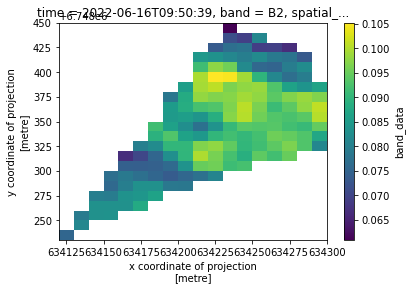

In [6]:
s2.zone_data["zone0"].band_data[0,0,:,:].plot()

### Save and check rasters

In [7]:
rfiles = s2.to_rasters("rasters/sentinel2")

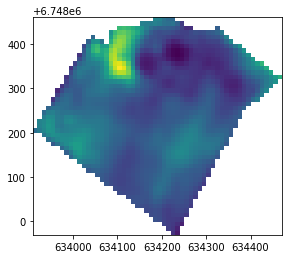

In [10]:
import rasterio
r = rasterio.open(rfiles[-1])
rasterio.plot.show(r.read(11), transform=r.transform)
r.close()